In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/msoa_loneliness.csv', index_col=0)
data = gpd.GeoDataFrame(data = data,
                            crs = 'epsg:27700', 
                            geometry = data['geometry'].apply(shapely.wkt.loads))
msoa_desirability = pd.read_csv('data/desirability_by_msoa.csv')
msoa_desirability = msoa_desirability.rename(columns={"MSOA Code":"MSOA"})
data = data.rename(columns={"msoa11cd":"MSOA"})

n_old = len(data.index)
data = data.merge(msoa_desirability, on='MSOA', how='left')


27.905% of MSOA without a score


/usr/bin/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


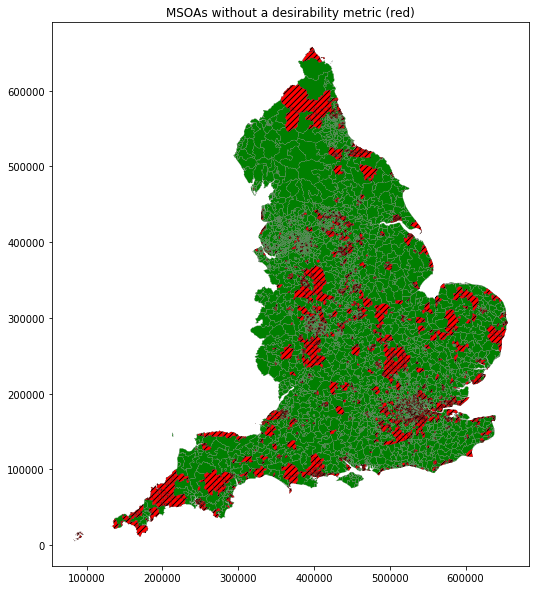

In [24]:
fig = plt.figure(figsize=(20,10))
print(str(np.round(np.mean(data['desirability.metric'].isna()),5)*100) + '% of MSOA without a score')
ax = data[ data['desirability.metric'].isna() == False].plot(column='isMissing', ax=fig.add_subplot(1,1,1),
                                                             color = 'green', figsize = (40,20), 
                                                             linewidth=0.2, edgecolor='grey')
data[ data['desirability.metric'].isna() ].plot(ax=ax, color='red', hatch = "////", linewidth=0.2, edgecolor='black')
ax.set_title('MSOAs without a desirability metric (red)')
#fig.savefig("plots/missing_desirability.pdf", bbox_inches='tight')

In [9]:
data['isMissing'] 

0       4
1       4
2       4
3       4
4       4
       ..
6786    4
6787    4
6788    4
6789    4
6790    3
Name: isMissing, Length: 6791, dtype: int64